In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Dataset used - https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data
df = pd.read_csv('Datasets/Car_prices.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [411]:
df = df[['horsepower', 'price']]
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [412]:
df.shape

(205, 2)

In [413]:
df.isnull().any()

horsepower    False
price         False
dtype: bool

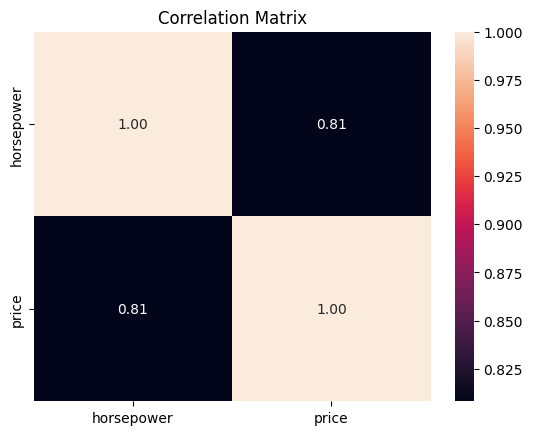

In [414]:
features = df.columns[0]
target = df.columns[1]
corr = df.corr()
plt.title("Correlation Matrix")
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

<Axes: xlabel='horsepower', ylabel='price'>

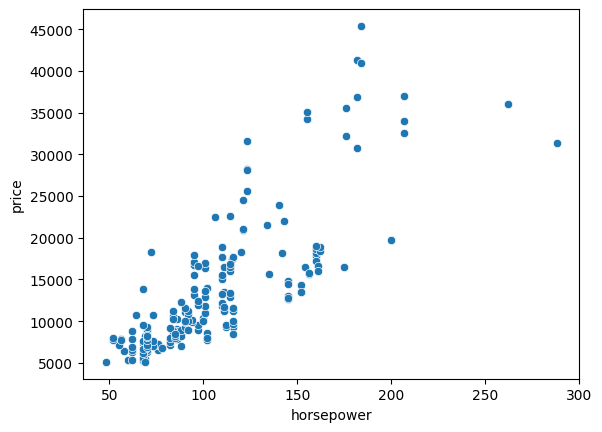

In [415]:
sns.scatterplot(data=df, x=features, y=target)

In [416]:
X = df[features].values
y = df[target].values

In [417]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [418]:
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))


The dimension of X_train is (164,)
The dimension of X_test is (41,)


In [419]:
metrics = pd.DataFrame(columns=["Metric", "Linear", "Ridge", "Lasso"])
metrics["Metric"] = ["MSE", "RMSE", "R2", "Intercept", "Slope"]

In [420]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1,1))
X_test = scaler.transform(X_test.reshape(-1,1))

In [421]:
regression = LinearRegression()

regression.fit(X_train, Y_train)
linearPrediction = regression.predict(X_test)

In [422]:
metrics["Linear"] = [mean_squared_error(Y_test, linearPrediction), np.sqrt(mean_squared_error(Y_test, linearPrediction)), r2_score(Y_test, linearPrediction), regression.intercept_, regression.coef_[0]]

print(f"y = {round(regression.intercept_, 3)} + {round(regression.coef_[0], 3)} * x")
print("Model Metrics:")
print("Mean Squared Error: " + str(mean_squared_error(Y_test, linearPrediction)))
print("Root Mean Squared Error: " + str(np.sqrt(mean_squared_error(Y_test, linearPrediction))))
print("R2 Score:" + str(r2_score(Y_test, linearPrediction)))

y = 12931.474 + 6161.019 * x
Model Metrics:
Mean Squared Error: 29446906.190344833
Root Mean Squared Error: 5426.5003630650235
R2 Score:0.6424128856989676


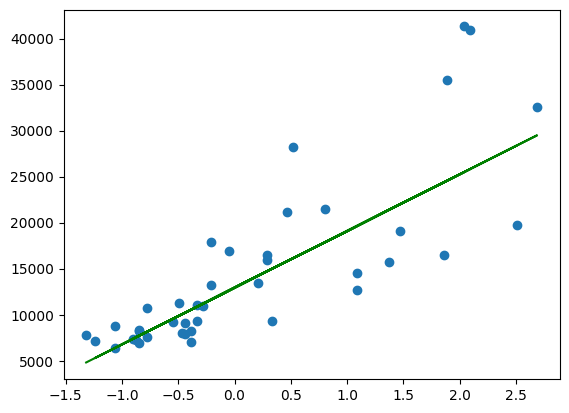

In [423]:
plt.scatter(X_test, Y_test)
plt.plot(X_test,linearPrediction, color="green")

In [424]:
#Ridge Regularization (L2)

ridgeReg = Ridge(10)

ridgeReg.fit(X_train,Y_train)
ridgePrediction = ridgeReg.predict(X_test)

In [425]:
metrics["Ridge"] = [mean_squared_error(Y_test, ridgePrediction), np.sqrt(mean_squared_error(Y_test, ridgePrediction)), r2_score(Y_test, ridgePrediction), ridgeReg.intercept_, ridgeReg.coef_[0]]

print(f"y = {round(ridgeReg.intercept_, 3)} + {round(ridgeReg.coef_[0], 3)} * x")
print("Model Metrics:")
print("Mean Squared Error: " + str(mean_squared_error(Y_test, ridgePrediction)))
print("Root Mean Squared Error: " + str(np.sqrt(mean_squared_error(Y_test, ridgePrediction))))
print("R2 Score:" + str(r2_score(Y_test, ridgePrediction)))

y = 12931.474 + 5806.938 * x
Model Metrics:
Mean Squared Error: 30188333.976462435
Root Mean Squared Error: 5494.391137920783
R2 Score:0.6334093924020274


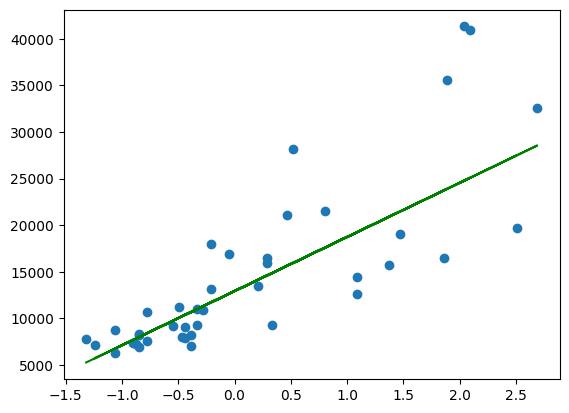

In [426]:
plt.scatter(X_test, Y_test)
plt.plot(X_test,ridgePrediction, color="green")

In [427]:
#Lasso Regularization (L2)

lassoReg = Lasso(10)

lassoReg.fit(X_train,Y_train)
lassoPrediction = lassoReg.predict(X_test)

In [428]:
metrics["Lasso"] = [mean_squared_error(Y_test, lassoPrediction), np.sqrt(mean_squared_error(Y_test, lassoPrediction)), r2_score(Y_test, lassoPrediction), lassoReg.intercept_, lassoReg.coef_[0]]

print(f"y = {round(lassoReg.intercept_, 3)} + {round(lassoReg.coef_[0], 3)} * x")
print("Model Metrics:")
print("Mean Squared Error: " + str(mean_squared_error(Y_test, lassoPrediction)))
print("Root Mean Squared Error: " + str(np.sqrt(mean_squared_error(Y_test, lassoPrediction))))
print("R2 Score:" + str(r2_score(Y_test, lassoPrediction)))

y = 12931.474 + 6151.019 * x
Model Metrics:
Mean Squared Error: 29463711.97370218
Root Mean Squared Error: 5428.0486340583
R2 Score:0.642208805462644


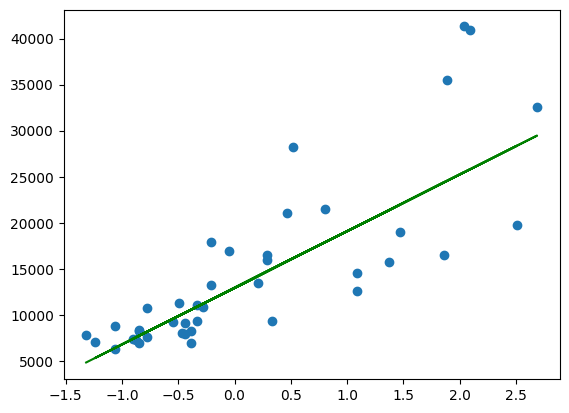

In [429]:
plt.scatter(X_test, Y_test)
plt.plot(X_test,lassoPrediction, color="green")

In [430]:
metrics

,Metric,Linear,Ridge,Lasso
0,MSE,2.944691e+07,3.018833e+07,2.946371e+07
1,RMSE,5.426500e+03,5.494391e+03,5.428049e+03
2,R2,6.424129e-01,6.334094e-01,6.422088e-01
3,Intercept,1.293147e+04,1.293147e+04,1.293147e+04
4,Slope,6.161019e+03,5.806938e+03,6.151019e+03


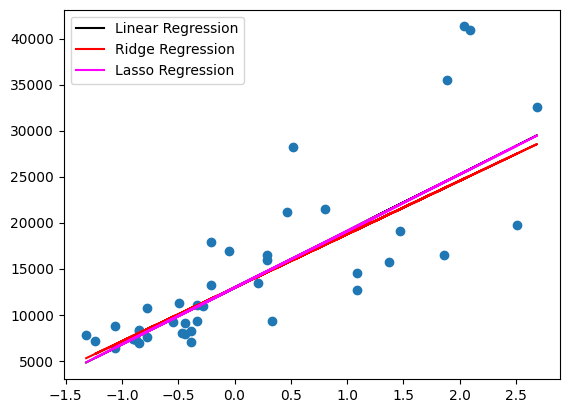

In [431]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, linearPrediction, color="black", label="Linear Regression")
plt.plot(X_test, ridgePrediction, color="red", label="Ridge Regression")
plt.plot(X_test, lassoPrediction, color="magenta", label="Lasso Regression")
plt.legend()